### A dataset for the delay record of all the commercial flights in the US in 2001.
There are a couple of interesting directions to explore in this dataset, especially the 9-11 incident has happened.

1. How had the delay time changed before and after the incident 
    - As shown in the probability distribution function histogram, the delay time distribution after the incident is slightly more right skewed than that of before the incident.  However, a careful hypothesis testing is required to quantity the significance of difference.

2. Correlation analyses
    - Is the arrival delay time correlated with days of week / year?  The boxplot of delay time versus day of week provides us some hints how has the arrival delay time vary with days of week.  It seems like the delay time is consistent throughout every day of the week, with 1-standard deviation around -10 to 10 minutes (Negative means earlier arrival).  In principle, we can repeat the same exercise for months throughout many years and at different locations.  In some areas such as Chicago, the delay time during the winter might be significantly larger than in the other seasons as the weather might prohibit flights to depart or arrive.  This requires further inspection.

    - Correlation analyses can be done to see which features (taxi time, security check time, carrier check time, etc) could correlate strongly with flight delay time.  Also, the correlation analysis would be a good way to provide the passengers hints of which airport would they likely to encounter flight delays.

    - Which pairs of airports (departure and arrival) would likely to have flight delay issues.

3. Time-series analysis
    - Data sets from different years can be combined to explore interesting data patterns, such as if the delay time has been shortened because of the advance in aviation technology?  Or if it has become more serious because there is an increasing demand of flight travels?

In [52]:
import urllib, os, bz2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Download the flight data from the web via python.

In [ ]:
url = "http://stat-computing.org/dataexpo/2009/2001.csv.bz2"
fname = "2001_flight.csv.bz2"
fname2 = "2001_flight.csv"
download = urllib.urlretrieve(url, fname)

os.system("open {}".format(fname))

Load in the flight data in 2001.

In [53]:
flight_df = pd.read_csv("{}".format(fname2), sep = ",")

We want to see if the Sept 11 incident had affected the delay time of the flights.  So we split the dataset into two groups.
1. Before 9-11
2. On and after 9-11

In [54]:
b911_df = flight_df[(flight_df["Month"] < 9) | ((flight_df["Month"] == 9) & (flight_df["DayofMonth"] < 11))]
a911_df = flight_df[(flight_df["Month"] > 9) | ((flight_df["Month"] == 9) & (flight_df["DayofMonth"] >= 11))]

Statistics summary of the two groups of data.

In [55]:
b911_avg = b911_df["ArrDelay"].mean()
a911_avg = a911_df["ArrDelay"].mean()
b911_std = b911_df["ArrDelay"].std()
a911_std = a911_df["ArrDelay"].std()

Here we illustrate a histogram, to get a sense of the distributions of arrival time delay prior to and post-911.

(-75, 200)

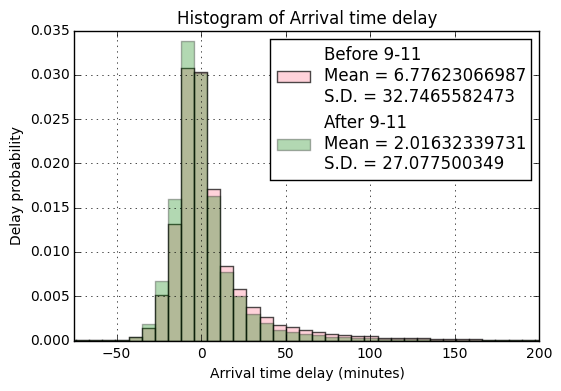

In [56]:
bin_num = 40
bin_max = 205.
bin_min = -105.
bin_range = (bin_max - bin_min) / bin_num

b911_df["ArrDelay"].hist(bins = bin_num, range = (bin_min, bin_max), normed = 1/bin_range, alpha = 0.7, color = "pink")
a911_df["ArrDelay"].hist(bins = bin_num, range = (bin_min, bin_max), normed = 1/bin_range, alpha = 0.3, color = "green")
plt.ylabel('Delay probability')
plt.xlabel('Arrival time delay (minutes)')
plt.title('Histogram of Arrival time delay')
plt.legend(['Before 9-11\nMean = {}\nS.D. = {}'.format(b911_avg,b911_std),'After 9-11\nMean = {}\nS.D. = {}'.format(a911_avg,a911_std)],loc = 'upper right')
plt.xlim([-75,200])

Next, we investigat if the delay time is related to the day of the week or not.

In [57]:
# Day of the week
W_IND = "DayOfWeek"

b911_week = np.array(map(int, b911_df[W_IND]))
a911_week = np.array(map(int, a911_df[W_IND]))

# Number of days in a week
WDAY_NUM = 7

BEF_week_arr = [0] * WDAY_NUM
AFT_week_arr = [0] * WDAY_NUM

for i in range(WDAY_NUM):
    BEF_week_arr[i] = b911_df.iloc[np.where(b911_week == i+1)[0]]["ArrDelay"]
    AFT_week_arr[i] = a911_df.iloc[np.where(a911_week == i+1)[0]]["ArrDelay"]

BEF_pos = np.arange(-0.25,9,1.5)
AFT_pos = np.arange(0.25,10,1.5)

Illustrating a box plot showing the statistical behavior of the delay time w.r.t. day of the weel. pre and post 9-11.

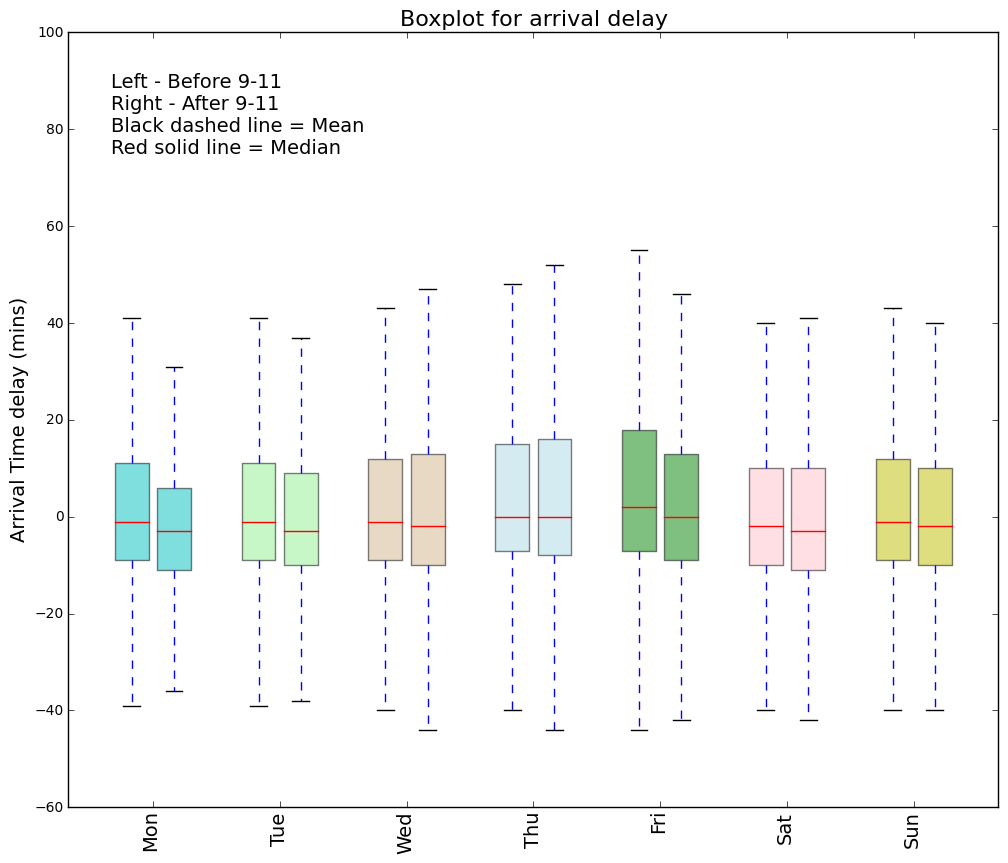

In [58]:
tick_pos = np.arange(0,9.5,1.5)
boxcolor = ["c","lightgreen","tan","lightblue","g","pink","y"]
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize = (12,10))
boxa = plt.boxplot([BEF_week_arr[i] for i in range(0,7)], meanline = True, showmeans = True, sym = '', positions = BEF_pos, widths = 0.4, patch_artist = True)
boxb = plt.boxplot([AFT_week_arr[i] for i in range(0,7)], meanline = True, showmeans = True, sym = '', positions = AFT_pos, widths = 0.4, patch_artist = True)
for patch, color in zip(boxa['boxes'], boxcolor):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch, color in zip(boxb['boxes'], boxcolor):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
plt.xticks(tick_pos, labels, rotation = 'vertical',fontsize = 14)
plt.text(-0.5,75, "Left - Before 9-11\nRight - After 9-11\nBlack dashed line = Mean\nRed solid line = Median", fontsize = 14)
plt.xlim([-1,10])
plt.ylim([-60,100])
plt.ylabel('Arrival Time delay (mins)',fontsize = 14)
plt.title('Boxplot for arrival delay',fontsize = 16)

In [ ]:
del flight_df, b911_df, a911_df